# Projet bigdata3: Objets perdus
 Auteur: **Kouomegne Tchienguing Betrand** Binome: **Barry alpha oumar** 

### 1. Expliquer et définir chacune des 7 colonnes du fichier des objets trouvés

Le jeux de données contient 07 Colonnes :
* **Date:** c'est la date à laquelle l'objet a été déclaré perdu par l'usagé. Il contient l'année, le mois, le jour et l'heure de la déclaration.
* **Date et heure de restitution:** c'est la date à laquelle l'objet a été restitué à l'usagé. Il contient l'année, le mois, le jour et l'heure de la restitution.
* **Gare:** c'est le nom de la gare d'ou l'objet a été déclaré perdu ou restitué
* **Code UIC:** c'est un code qui identifie de facon unique l'object
* **Nature d'objets:** Il represente la nature de l'object selon son utilité
* **Type d'objets:** Il represente la classe de l'object classé dans un groupe selon leurs caractéristiques physique par la SNCF
* **Type d'enregistrement:** désigne comment l'object a été enregistré. cette colonne n'a qu'une modalité "Objet trouvé"

### 2. Charger le jeu de données en pandas. Remarquez-vous quelque chose au moment de chargement ?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

db_objets_trouves=pd.read_csv("objets-trouves-restitution.csv",sep=";") # Chargement base "objets-trouvés"

On remarque que lorsqu'on charge les données sans préciser que le séparateur est ";" on a une erreur puisque les données ont pour séparateur ';' et que la fonction "read_csv()" par défaut considère comme séparateur ','.

### 3. Décrire le jeu de données : donner les types, étudier les valeurs nulles, la cardinalité des différentes catégories, etc.
###### a)  Les types de chaque colonnes

In [2]:
db_objets_trouves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687186 entries, 0 to 687185
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          687186 non-null  object 
 1   Date et heure de restitution  234749 non-null  object 
 2   Gare                          686895 non-null  object 
 3   Code UIC                      686895 non-null  float64
 4   Nature d'objets               687186 non-null  object 
 5   Type d'objets                 687186 non-null  object 
 6   Type d'enregistrement         687186 non-null  object 
dtypes: float64(1), object(6)
memory usage: 36.7+ MB


la colonne "Code UIC" est de type float c'est à dire une série de nombres réels.
L'ensemble des autres colonnes sont de type "object" c'est à dire qu'il contient des objects de type "string" {chaine de caractère}

###### b) Etude des valeurs nulles
les colonnes "Date et heure de restitution", "Gare" et "Code UIC" sont les seules colonnes avec des valeurs manquantes les autres colonnes sont remplies. Donc nous allons juste étudier les valeurs manquantes pour les colonnes mentionnées précédemments. 

In [8]:
## Affichage des objets qui n'ont pas de date de restitution
db_objets_trouves.loc[db_objets_trouves["Date et heure de restitution"].isnull()].head(1)

,Date,Date et heure de restitution,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement
0,2019-03-26T11:43:40+01:00,NaN,Paris Montparnasse,87391003.0,"Sac de voyage, sac de sport, sac à bandoulière","Bagagerie: sacs, valises, cartables",Objet trouvé


Il s'agit des objects qui n'ont pas été restitués

In [7]:
# la liste des objects qui n'ont pas de Gare. ca correspond aux ojects qui n'ont pas de code UIC. Il s'agit peut-être d'objects
# qui ont été trouvés hors de la gare et qui ont été déclarés perdus sur le site ou des erreurs d'enregistrement.
db_objets_trouves.loc[db_objets_trouves["Gare"].isnull()].head(1)

,Date,Date et heure de restitution,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement
3123,2019-11-27T19:51:31+01:00,NaN,NaN,NaN,"Sac d'enseigne (plastique, papier, …)","Bagagerie: sacs, valises, cartables",Objet trouvé


In [6]:
# La liste des objects qui n'ont pas de code UIC
db_objets_trouves.loc[db_objets_trouves["Code UIC"].isnull()].head(1)

,Date,Date et heure de restitution,Gare,Code UIC,Nature d'objets,Type d'objets,Type d'enregistrement
3123,2019-11-27T19:51:31+01:00,NaN,NaN,NaN,"Sac d'enseigne (plastique, papier, …)","Bagagerie: sacs, valises, cartables",Objet trouvé


### 4. Ce jeu de données contient deux colonnes de dates. Convertir ces colonnes en format de date plus utilisable pour la suite. C’est-à-dire un format où il est plus simple de récupérer l’année, le mois ou le jour par exemple.

In [9]:
#Pour la colonne 'Date'
db_objets_trouves["New_date"] = db_objets_trouves["Date"].str[:10]
db_objets_trouves["New_date"]=pd.to_datetime(db_objets_trouves["New_date"])

In [11]:
#Pour la colonne 'Date et heure de restitution'
db_objets_trouves["New_date_rest"] = db_objets_trouves["Date et heure de restitution"].str[:10]
db_objets_trouves["New_date_rest"]=pd.to_datetime(db_objets_trouves["New_date_rest"])

### 5. Donner la date de début du jeu de données.

In [12]:
Date_de_debut = db_objets_trouves["New_date"].min()
print("La date de début du jeu de données est:",Date_de_debut)

La date de début du jeu de données est: 2013-05-24 00:00:00


### 6. Dans cette question vous effectuerez l’analyse sur le jeu de données des objets trouvés mais aussi des objets déclarés perdus. 

In [13]:
db_declares_perdus=pd.read_csv("objets-trouves-gares.csv",sep=";") # Chargement base "declarés-perdus"

In [14]:
db_declares_perdus["New_date"] = db_declares_perdus["Date"].str[:10]
db_declares_perdus["New_date"]=pd.to_datetime(db_declares_perdus["New_date"]) # Conversion de la colonne 'Date' en format plus utilisable

#### 6.a Donner l’année, le mois et le jour de la semaine où il y a le plus d’objets trouvés et déclarés perdus. Créer des graphique en colonnes affichant le résultat.

##### Dans cette partie, on cré des colonnes supplémentaires dans les 2 fichiers de données pour séparer la date en Année, Mois et Jour.

In [15]:
#Pour les objets trouvés
db_objets_trouves["Year"]=db_objets_trouves["New_date"].dt.year
db_objets_trouves["Month"]=db_objets_trouves["New_date"].dt.month_name()
db_objets_trouves["Day"]=db_objets_trouves["New_date"].dt.day_name()

#Pour les objets déclarés perdus
db_declares_perdus["Year"]=db_declares_perdus["New_date"].dt.year
db_declares_perdus["Month"]=db_declares_perdus["New_date"].dt.month_name()
db_declares_perdus["Day"]=db_declares_perdus["New_date"].dt.day_name()

#### Année où il y a le plus d'objet trouvés

In [16]:
OT_gares_per_year=db_objets_trouves.groupby("Year")["Code UIC"].count()
OT_gares_per_year.sort_values(ascending=False).head(1)

Year
2015    98546
Name: Code UIC, dtype: int64

#### Mois où il y a le plus d'objet trouvés

In [17]:
OT_gares_per_month=db_objets_trouves.groupby("Month")["Code UIC"].count()
OT_gares_per_month.sort_values(ascending=False).head(1)

Month
July    69638
Name: Code UIC, dtype: int64

#### Jour de la semaine où il y a le plus d'objet trouvés

In [18]:
OT_gares_per_day=db_objets_trouves.groupby("Day")["Code UIC"].count()
OT_gares_per_day.sort_values(ascending=False).head(1)

Day
Monday    141625
Name: Code UIC, dtype: int64

<AxesSubplot:xlabel='Day'>

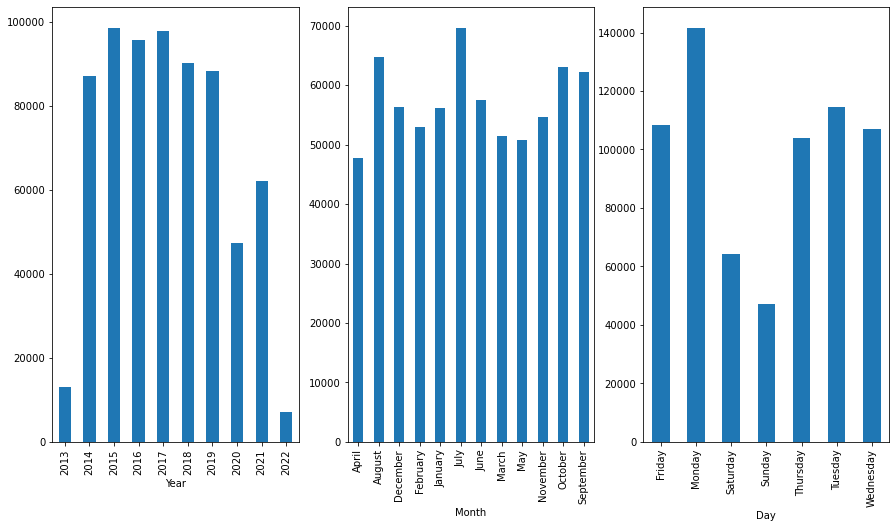

In [19]:
fig, ax = plt.subplots(1,3,figsize=(15, 8))
OT_gares_per_year.plot(kind="bar",ax=ax[0])
OT_gares_per_month.plot(kind="bar",ax=ax[1])
OT_gares_per_day.plot(kind="bar",ax=ax[2])


#### Année où il y a le plus d'objet déclarés perdus

In [20]:
DP_gares_per_year=db_declares_perdus.groupby("Year")["Code UIC"].count()
DP_gares_per_year.sort_values(ascending=False).head(1)

Year
2014    56068
Name: Code UIC, dtype: int64

#### Mois où il y a le plus d'objet déclarés perdus

In [21]:
DP_gares_per_month=db_declares_perdus.groupby("Month")["Code UIC"].count()
DP_gares_per_month.sort_values(ascending=False).head(1)

Month
July    38003
Name: Code UIC, dtype: int64

#### Jour de la semaine où il y a le plus d'objet déclarés perdus

In [22]:
DP_gares_per_day=db_declares_perdus.groupby("Day")["Code UIC"].count()
DP_gares_per_day.sort_values(ascending=False).head(1)

Day
Monday    76796
Name: Code UIC, dtype: int64

<AxesSubplot:xlabel='Day'>

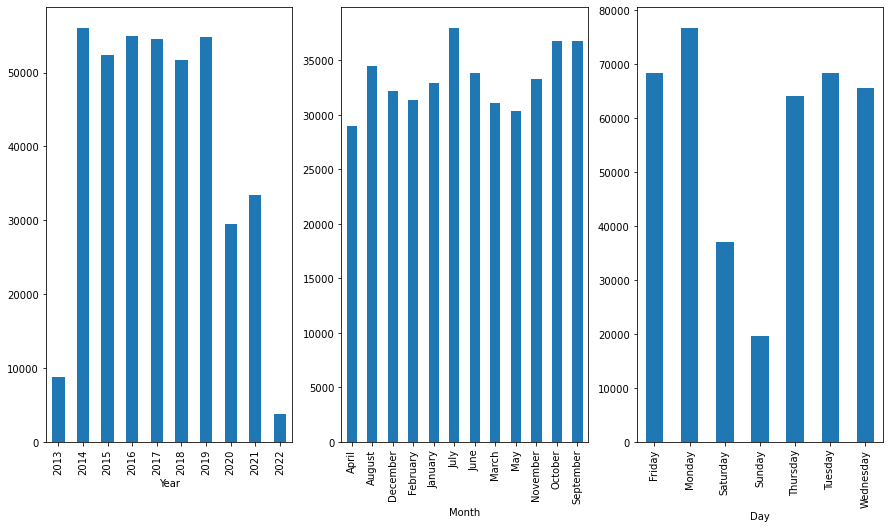

In [23]:
fig, ax = plt.subplots(1,3,figsize=(15, 8))
DP_gares_per_year.plot(kind="bar",ax=ax[0])
DP_gares_per_month.plot(kind="bar",ax=ax[1])
DP_gares_per_day.plot(kind="bar",ax=ax[2])

#### 6.b Tracer trois courbes affichant l’évolution du nombres d’objets déclarés perdus, trouvés et restitué depuis le début du jeu de donnée.

Text(0.5, 1.0, "Evolution du nombre d'objets declarés perdus par année")

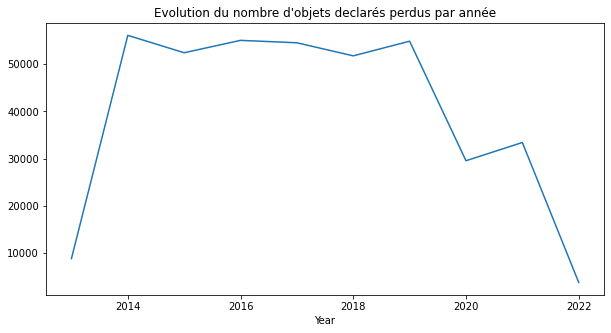

In [26]:
#Evolution du nombre d'objets "Déclarés perdus" par année
DP_gares_evolution=db_declares_perdus.groupby("Year")["Code UIC"].count()
DP_gares_evolution.plot(kind='line',figsize=(10,5))
plt.title("Evolution du nombre d'objets declarés perdus par année")

In [27]:
#Extraction de données concernant les objets trouvés et restitués en exploitant la colonne Date et heure de restitution
objets_trouves_rest = db_objets_trouves[~db_objets_trouves['Date et heure de restitution'].isnull()]

In [28]:
#Extraction de données concernant les objets trouvés mais non restiués en exploitant la colonne Date et heure de restitution
objets_trouves_non_rest=db_objets_trouves[~db_objets_trouves['Date et heure de restitution'].notnull()]

In [29]:
#Evolution du nombre d'objets "Trouvés et restitués" par année
objets_trouve_evolution=db_objets_trouves.groupby("Year")["Code UIC"].count()
objets_trouves_rest_evolution=objets_trouves_rest.groupby("Year")["Code UIC"].count()
objets_trouves_non_rest_evolution=objets_trouves_non_rest.groupby("Year")["Code UIC"].count()

Text(0.5, 1.0, "Courbes d'évolution des objets trouvés en gare")

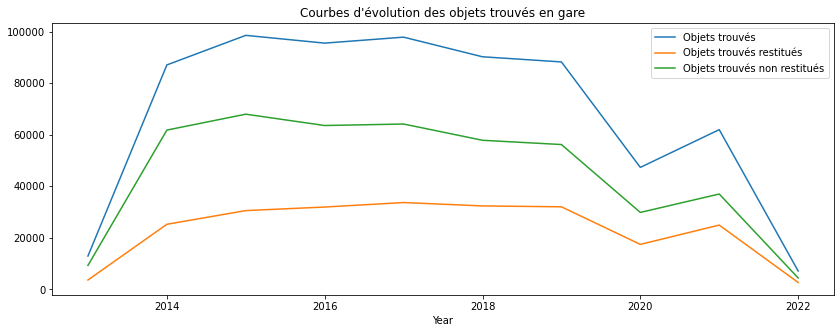

In [36]:
objets_trouve_evolution.plot(kind='line',figsize=(14,5))
objets_trouves_rest_evolution.plot(kind='line')
objets_trouves_non_rest_evolution.plot(kind='line')
plt.legend(["Objets trouvés","Objets trouvés restitués","Objets trouvés non restitués"])
plt.title("Courbes d'évolution des objets trouvés en gare")

#### 7. les trois gares ou il y'a le plus d'objects restitués en pourcentage des objects perdus

In [37]:
# cette variable regroupe le nombre d'objects restitués par gares 
objets_trouves_rest_Gare=objets_trouves_rest.groupby("Gare")["Code UIC"].count()

# cette variable regroupe le no;bre d'objects trouvés pqr gares
db_objets_trouves_Gare=db_objets_trouves.groupby("Gare")["Code UIC"].count()

# vu que les gares sont regroupés par ordre alphabétiques, on peut calculer la proportion d'objects restitués par rapport aux objects trouvés par gares
Objet_gare_rest_per_objets_trouve= (objets_trouves_rest_Gare/db_objets_trouves_Gare)*100

# on fait un classement par pourcentage le plus élévé et on récupère les trois premiers
Objet_gare_rest_per_objets_trouve.sort_values(ascending=False).head(3)


Gare
Bellegarde         64.149140
Dieppe             62.376238
Bourg-en-Bresse    62.087186
Name: Code UIC, dtype: float64

## 8. Carte de la france avec le volume d'objects perdus par gare

#### 8.a volume d'objects déclarés perdus par gare

In [38]:
object_perdu_per_gare=db_declares_perdus.groupby("Gare")["Code UIC"].count()

In [39]:
## on tranforme les index en colone de gare afin d'obtenir un dataFrame manipulable 
db_object_perdu_per_gare=object_perdu_per_gare.reset_index()

#### 8.b Association des coordonnées GPS de chaque gare

In [40]:
from geopy.geocoders import Nominatim

db_object_perdu_per_gare["Gare_lat"]=""
db_object_perdu_per_gare["Gare_long"]=""
df = db_object_perdu_per_gare.iloc[:]
geolocator = Nominatim(user_agent="G-app")

for i in df.index:
    try:
        location = geolocator.geocode(db_object_perdu_per_gare['Gare'][i])
        
        db_object_perdu_per_gare.loc[i,'Gare_lat'] = location.latitude
        db_object_perdu_per_gare.loc[i,'Gare_long'] = location.longitude
    except:
        
        db_object_perdu_per_gare.loc[i,'Gare_lat'] = ""
        db_object_perdu_per_gare.loc[i,'Gare_long'] = ""

,Gare,Code UIC,Gare_lat,Gare_long
0,Abbeville,35,50.106083,1.833703
1,Agen,1167,44.201583,0.617611
2,Aix-en-Provence TGV,1446,43.455145,5.317287
3,Aix-les-Bains le Revard,80,45.688138,5.908928
4,Alençon,67,48.431206,0.091137


#### 8.c carte avec les gares par volume d'objets perdus

In [42]:
import folium
from folium.plugins import MarkerCluster

## suppression des lignes avec des données manquantes pour la latitude et la longitude
db_object_perdu_per_gare.drop(db_object_perdu_per_gare.loc[db_object_perdu_per_gare["Gare_lat"]==''].index, inplace=True)

carte= folium.Map([48.856614, 2.3522219])

markerCluster=MarkerCluster().add_to(carte)
df = db_object_perdu_per_gare.iloc[:]

for i in df.index:
    popupT=db_object_perdu_per_gare["Gare"][i] + "<br>" + str(db_object_perdu_per_gare["Code UIC"][i])
    folium.Marker(
    location=[db_object_perdu_per_gare["Gare_lat"][i],db_object_perdu_per_gare["Gare_long"][i]],
    popup=popupT,
    icon=folium.Icon(color="blue"),).add_to(markerCluster)

carte 

#### 8.d Associer un sélecteur

## 9. fouille et recherche d'informations pertinentes 
pour cette question, nous avons fait un ensemble d'étapes avec pour objectif de montrer les types d'objects qui se perdent le plus. 

In [43]:
# Nombre d'objets trouvés par types d'objects
OR_par_type_objet=objets_trouves_rest.groupby("Type d'objets")["Code UIC"].count()

# Proportion des objects trouvés par types d'objects  
OR_par_type_objet_proportion=(OR_par_type_objet/objets_trouves_rest["Code UIC"].count())*100

# les trois types d'objects les plus retrouvés
OR_par_type_objet_proportion.sort_values(ascending=False).head(3)

Type d'objets
Bagagerie: sacs, valises, cartables                        44.313694
Appareils électroniques, informatiques, appareils photo    18.584825
Porte-monnaie / portefeuille, argent, titres               14.300017
Name: Code UIC, dtype: float64

(-1.25, 1.25, -1.25, 1.25)

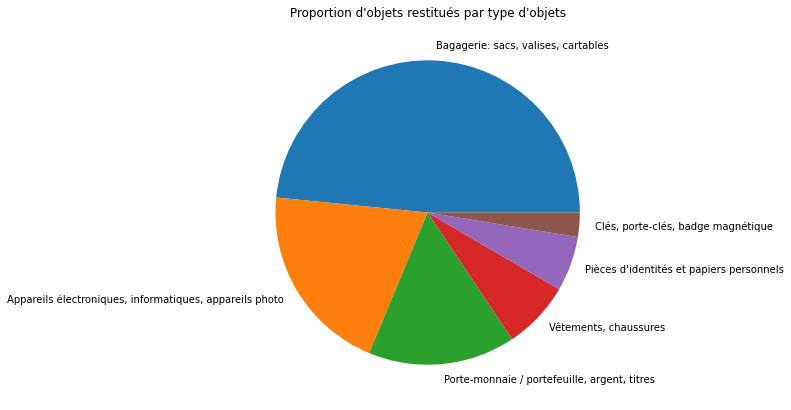

In [44]:
# diagramme des objects restitues par types d'objects parmis les principaux
OR_par_type_objet_proportion.sort_values(ascending=False).head(6).plot(kind='pie',figsize =(20, 7))
plt.title("Proportion d'objets restitués par type d'objets")
plt.axis("off")

In [45]:
# Nombre d'objets perdus par types d'objects
DP_par_type_objet=db_declares_perdus.groupby("Type d'objets")["Code UIC"].count()

# Proportion des objects perdus par types d'objects
DP_par_type_objet_proportion=(DP_par_type_objet/db_declares_perdus["Code UIC"].count())*100

# les trois types d'objects les plus perdus
DP_par_type_objet_proportion.sort_values(ascending=False).head(3)

Type d'objets
Bagagerie: sacs, valises, cartables                        37.794437
Appareils électroniques, informatiques, appareils photo    18.838744
Porte-monnaie / portefeuille, argent, titres               14.095759
Name: Code UIC, dtype: float64

(-1.25, 1.25, -1.25, 1.25)

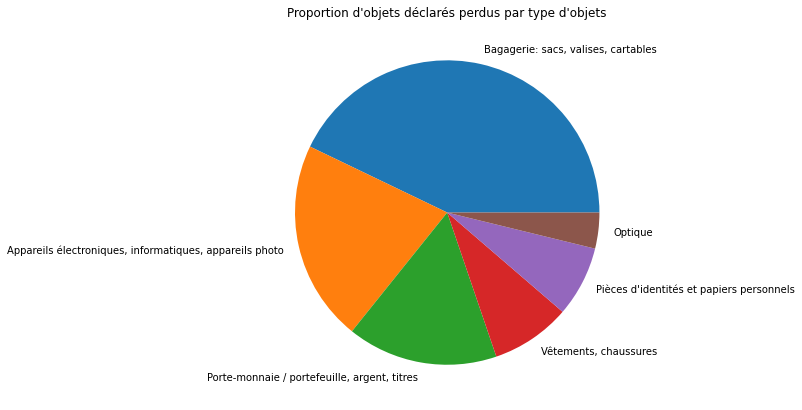

In [46]:
# diagramme des objects déclarés perdus par types d'objects parmis les principaux
DP_par_type_objet_proportion.sort_values(ascending=False).head(6).plot(kind='pie',figsize =(20, 7))
plt.title("Proportion d'objets déclarés perdus par type d'objets")
plt.axis("off")

In [47]:
## On va creer une base de donnees par type d'obets qui se perdent le plus

db_bagagerie_perdus=db_declares_perdus[db_declares_perdus["Type d'objets"] == "Bagagerie: sacs, valises, cartables"]
db_appareils_electro_perdus=db_declares_perdus[db_declares_perdus["Type d'objets"]=="Appareils électroniques, informatiques, appareils photo"]
db_porte_monnaie_perdus=db_declares_perdus[db_declares_perdus["Type d'objets"]=="Porte-monnaie / portefeuille, argent, titres"]

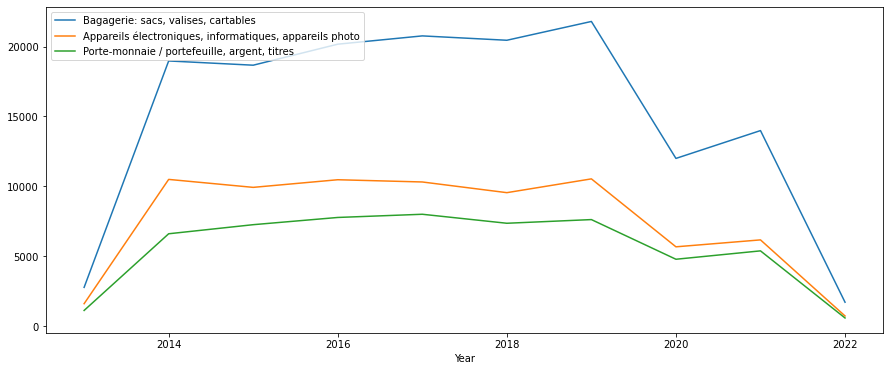

In [50]:
# évolution des trois types d'objects les plus perdus 
db_bagagerie_perdus.groupby("Year")["Code UIC"].count().plot(kind='line',figsize=(15,6))
db_appareils_electro_perdus.groupby("Year")["Code UIC"].count().plot(kind='line')
db_porte_monnaie_perdus.groupby("Year")["Code UIC"].count().plot(kind='line')
plt.legend(["Bagagerie: sacs, valises, cartables", "Appareils électroniques, informatiques, appareils photo","Porte-monnaie / portefeuille, argent, titres"],loc ="upper left")

## 10: Prédiction du nombre d'objects perdus en 2022 (Regression polynomiale)

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Objects peredus par gares et par mois
DP_gares_per_Year_Month_3=db_declares_perdus.groupby(by=["Year","Month"])["Code UIC"].count()
DP_gares_per_Year_Month_3=DP_gares_per_Year_Month_3.to_frame()

## on tranforme les index en deux colonnes (year et months) afin d'obtenir un dataFrame manipulable
DP_gares_per_Year_Month_3.reset_index()

,Year,Month,Code UIC
0,2013,August,604
1,2013,December,2446
2,2013,July,857
3,2013,June,715
4,2013,May,174
...,...,...,...
101,2021,November,3033
102,2021,October,3153
103,2021,September,3455
104,2022,February,1214


In [53]:
import numpy as np

## on cree une colone
DP_gares_per_Year_Month_3['Period'] = np.arange(1, len(DP_gares_per_Year_Month_3)+1)

DP_gares_per_Year_Month_3=DP_gares_per_Year_Month_3.reset_index()

In [54]:
# polynôme de second dégré 
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(DP_gares_per_Year_Month_3[["Period"]])

In [55]:
# creation de la variable de regression 
regr = LinearRegression()
regr.fit(X, DP_gares_per_Year_Month_3["Code UIC"])

LinearRegression()

<AxesSubplot:xlabel='Period', ylabel='Code UIC'>

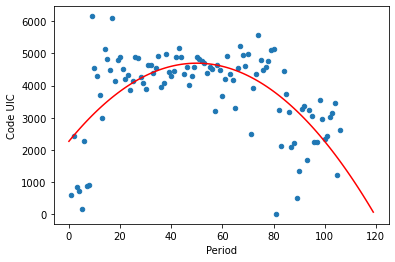

In [56]:
# 
predictions = regr.predict(
    poly.fit_transform([[Period] for Period in range(120)])
)

ax = DP_gares_per_Year_Month_3.plot(kind="scatter", x="Period", y="Code UIC")
pd.Series(predictions).plot(ax=ax, color="red")

In [57]:
## prédiction de du nombre d'objects perdus pour l'année 2022
pd.Series(predictions).to_frame().tail(12).sum()

0    9145.618152
dtype: float64

## 11. Question bonus